# **Predicting turbine energy yield (TEY) using ambient variables as features**

###**Importing Necessary Libraries**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# first neural network with keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

###**Import Dataset**

In [ ]:
gas_turbine = pd.read_csv('gas_turbines.csv')
gas_turbine.head(7)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440


### **Attribute Information:**

The explanations of sensor measurements and their brief statistics are given below.
* Variable (Abbr) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

###**Data Understanding:**

In [ ]:
# Checking for the information of the data
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas_turbine.shape

(15039, 11)

In [ ]:
gas_turbine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
gas_turbine.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [ ]:
gas_turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


###**Visualization**

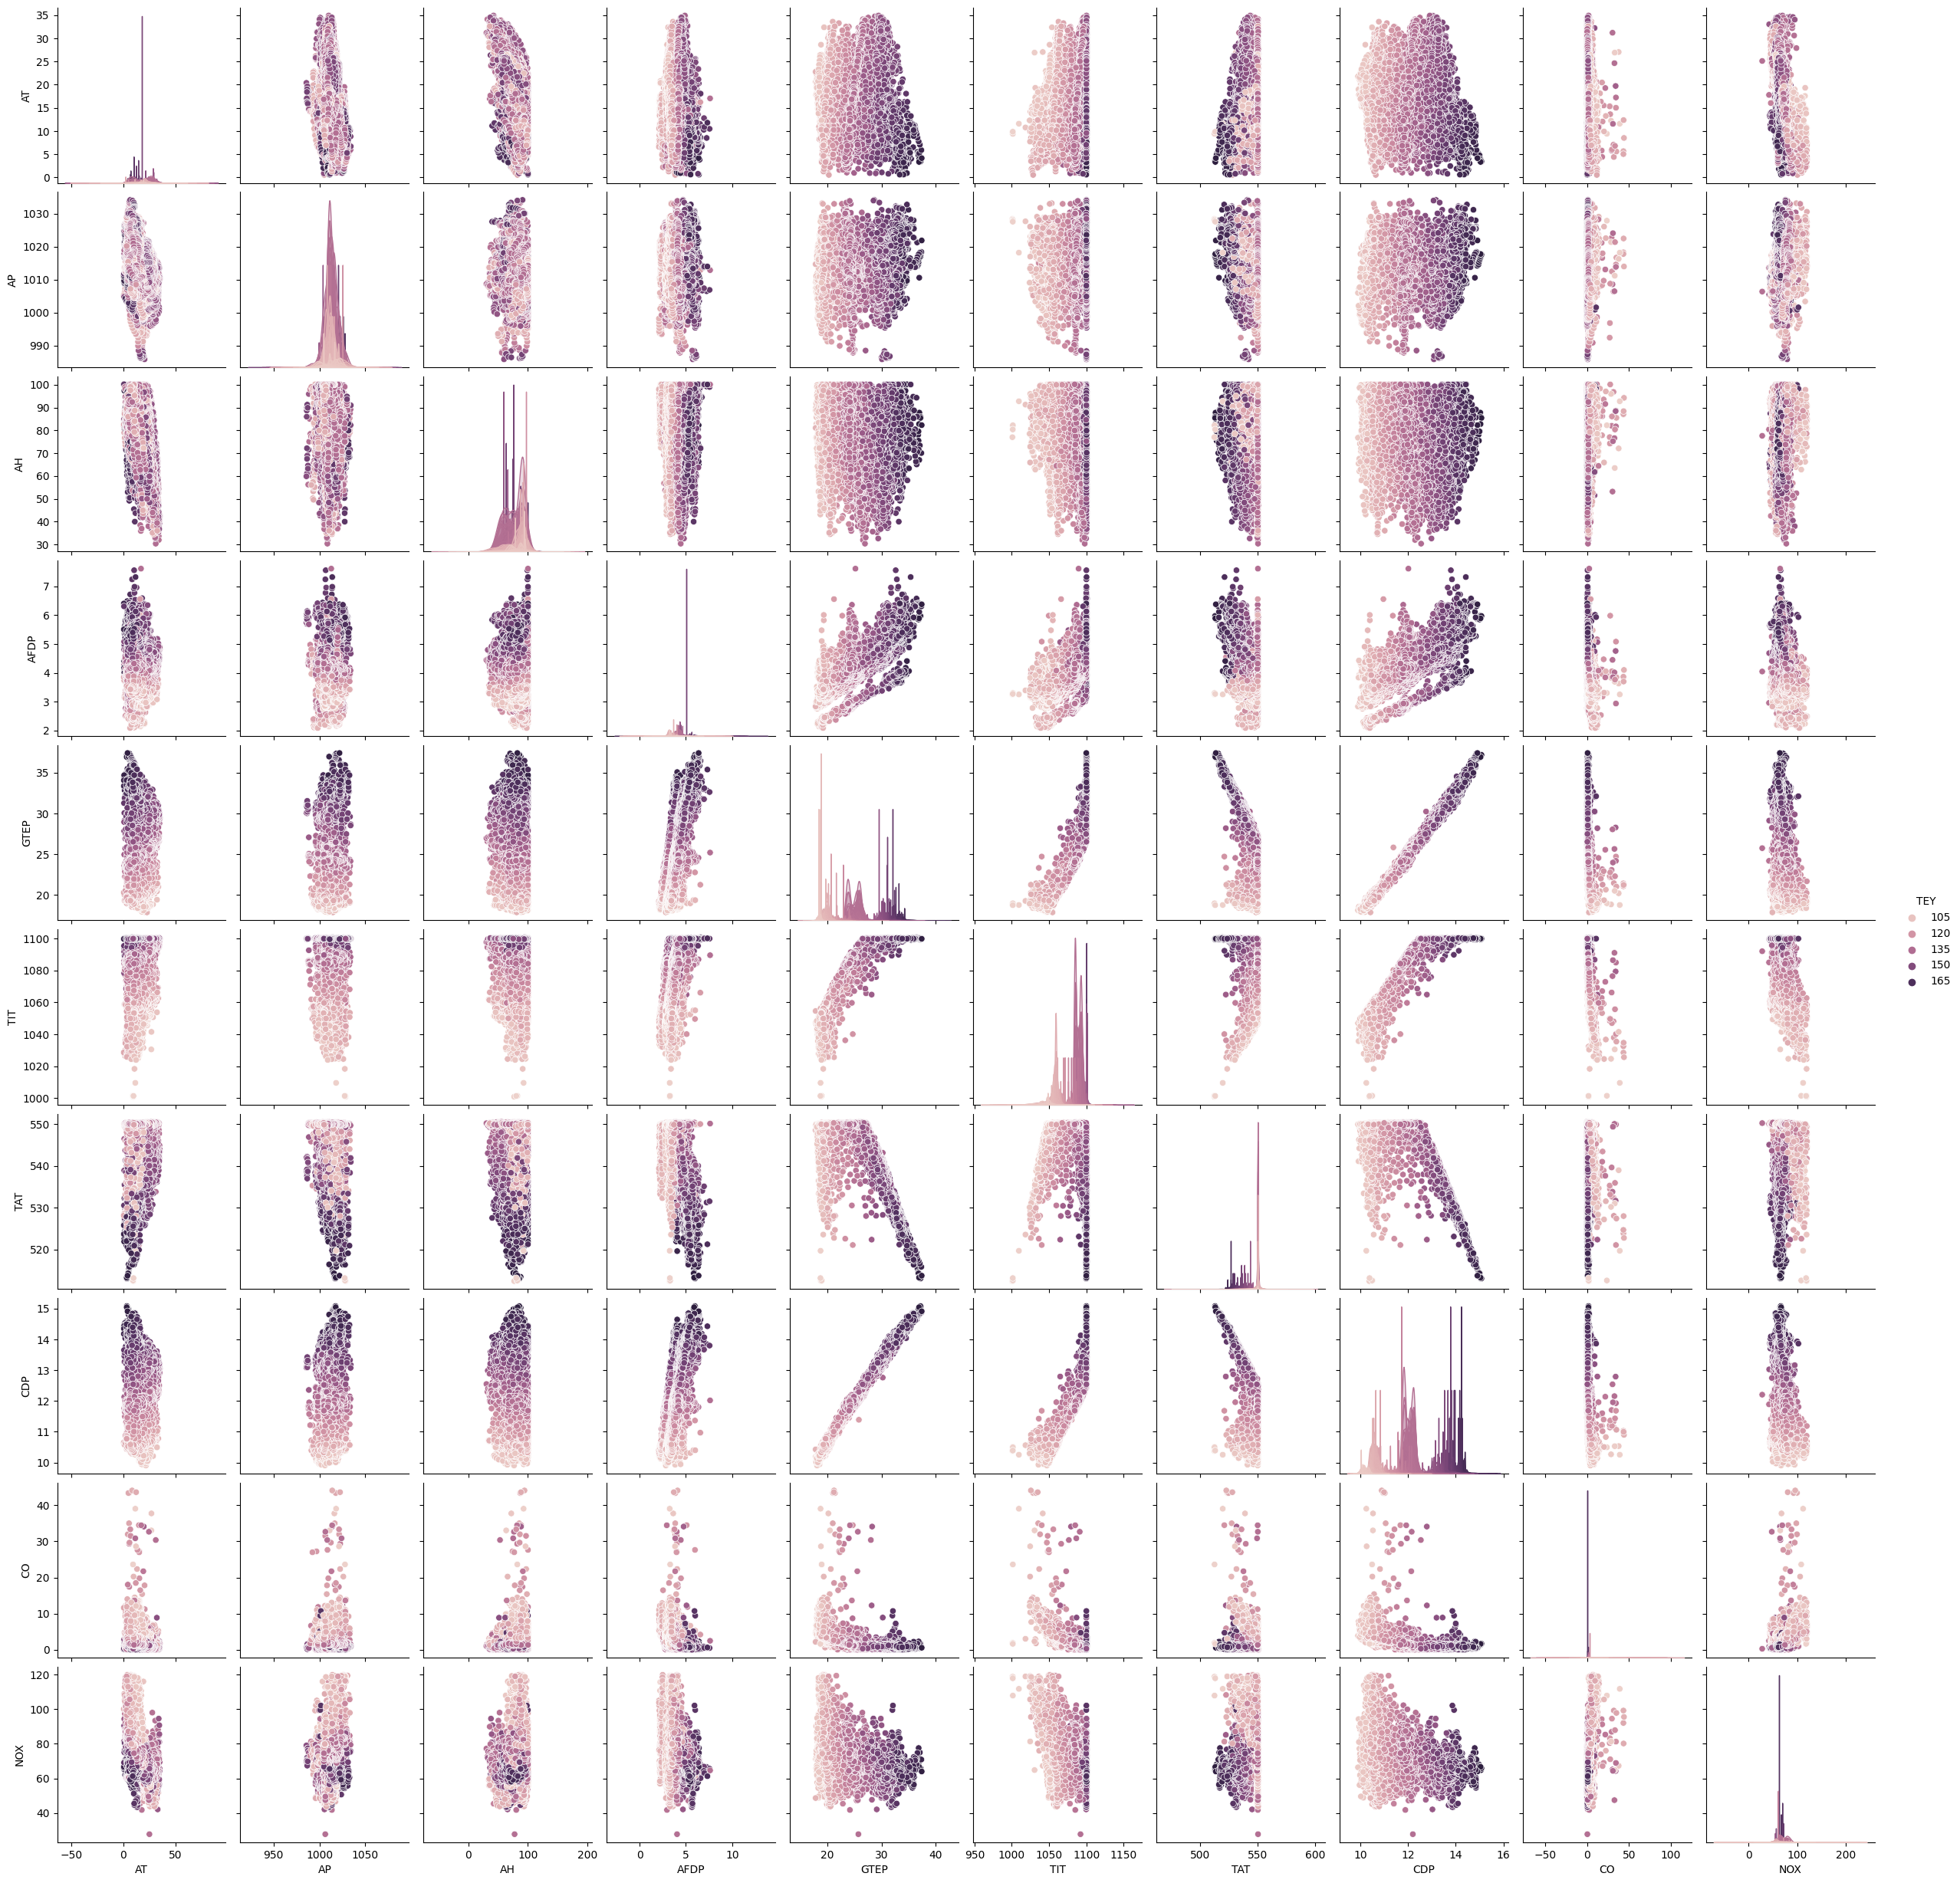

In [ ]:
sns.pairplot(gas_turbine, hue='TEY')

<Figure size 1000x800 with 0 Axes>

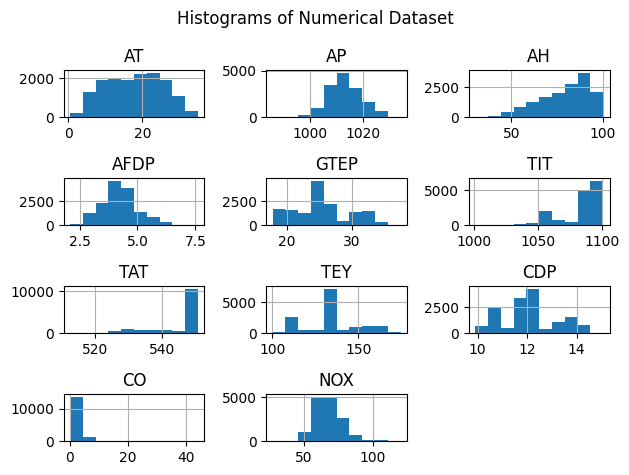

In [ ]:
plt.figure(figsize=(10, 8))
# Plotting histograms for each column
gas_turbine.hist(bins=10)  # Adjust the number of bins as needed

# Adding labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.suptitle("Histograms of Numerical Dataset")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the histograms
plt.show()

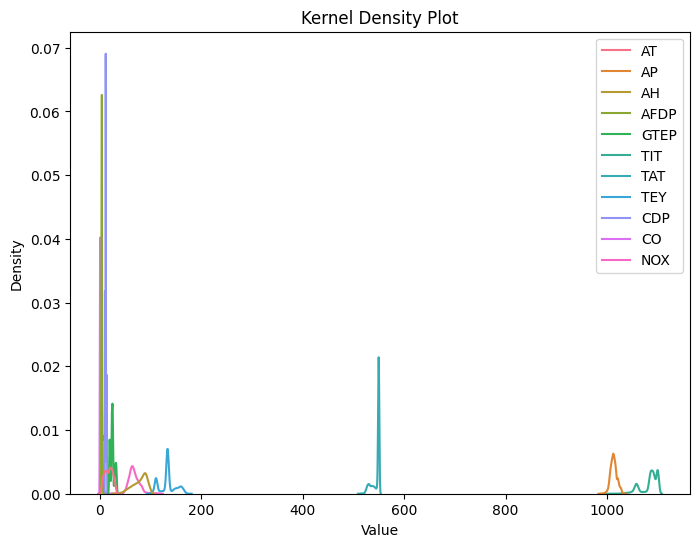

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(gas_turbine)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot')
plt.show()

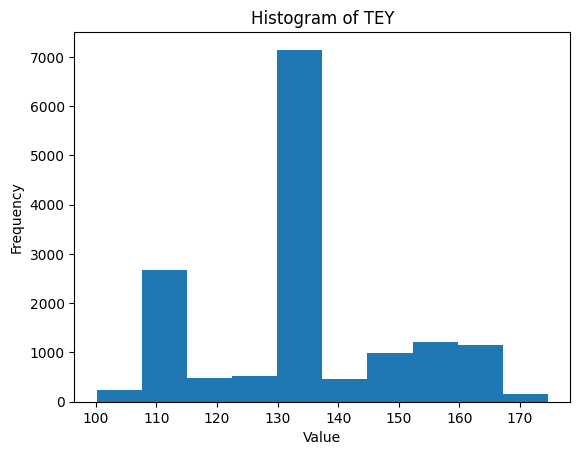

In [ ]:
plt.hist(gas_turbine['TEY'], bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of TEY')  # Set the title
plt.xlabel('Value')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Show the plot

In [ ]:
# Grouping the Data by categorical column
gas_turbine.groupby(['TEY', 'TAT' ,'TIT']).count()

,,,AT,AP,AH,AFDP,GTEP,CDP,CO,NOX
TEY,TAT,TIT,,,,,,,,
100.17,513.17,1001.3,1,1,1,1,1,1,1,1
100.32,512.60,1001.4,1,1,1,1,1,1,1,1
100.52,512.45,1000.8,1,1,1,1,1,1,1,1
100.83,519.71,1009.5,1,1,1,1,1,1,1,1
100.96,512.60,1001.4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
173.43,513.75,1099.9,1,1,1,1,1,1,1,1
173.92,513.47,1099.5,1,1,1,1,1,1,1,1
174.25,513.06,1099.5,1,1,1,1,1,1,1,1


In [ ]:
gas_turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


As the target variable (i.e., the column "TEY") is continuous rather than binary, 

we must run regression tasks here instead of  binary classification.

In [ ]:
#Let's Normalizing or standardizing the values of columns for Scale Independence,Interpretability,Outlier Sensitivity.
# Select columns to normalize (all columns)
columns_to_normalize = gas_turbine.columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the columns
gas_turbine[columns_to_normalize] = scaler.fit_transform(gas_turbine[columns_to_normalize])

# Print the normalized dataset
print(gas_turbine)

             AT        AP        AH      AFDP      GTEP    TIT       TAT  \
0      0.184182  0.456050  0.951314  0.255758  0.091426  0.584  0.984015   
1      0.182020  0.466391  0.955881  0.255721  0.094755  0.585  0.984015   
2      0.185295  0.474664  0.939003  0.252571  0.097367  0.586  0.980608   
3      0.189922  0.482937  0.929126  0.252227  0.098033  0.588  0.983753   
4      0.199830  0.493278  0.927708  0.255323  0.096650  0.589  0.983491   
...         ...       ...       ...       ...       ...    ...       ...   
15034  0.247272  0.408480  0.975092  0.263380  0.065868  0.489  0.884696   
15035  0.214075  0.414685  0.984153  0.256826  0.078672  0.455  0.806342   
15036  0.195962  0.422958  0.989922  0.251593  0.084614  0.369  0.651730   
15037  0.188443  0.433299  0.982936  0.246451  0.076777  0.424  0.754455   
15038  0.186173  0.441572  0.961821  0.242631  0.073141  0.491  0.875262   

            TEY       CDP        CO       NOX  
0      0.195191  0.135340  0.071522  0.

In [ ]:
X=gas_turbine.drop(['TEY'], axis=1)
Y=gas_turbine[['TEY']].values.flatten()
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [ ]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [ ]:
#As the dataset having maximum number of values so here test on 10% of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
y_train = y_train.reshape(-1)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13535, 10), (13535,), (1504, 10), (1504,))

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='linear')) #default activation for regression problems

In [ ]:
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam') #(MSE) is commonly used loss function for regression

In [ ]:
# fit the keras model on the dataset
history = model.fit(x_test, y_test, epochs=91, validation_split=0.33, batch_size=10)

Epoch 1/91
101/101 [==============================] - 1s 5ms/step - loss: 0.0180 - val_loss: 0.0065
Epoch 2/91
101/101 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 3/91
101/101 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 8.8442e-04
Epoch 4/91
101/101 [==============================] - 0s 4ms/step - loss: 6.6916e-04 - val_loss: 5.5644e-04
Epoch 5/91
101/101 [==============================] - 0s 3ms/step - loss: 4.7252e-04 - val_loss: 4.6289e-04
Epoch 6/91
101/101 [==============================] - 0s 4ms/step - loss: 4.1081e-04 - val_loss: 3.9931e-04
Epoch 7/91
101/101 [==============================] - 0s 4ms/step - loss: 3.6325e-04 - val_loss: 3.9427e-04
Epoch 8/91
101/101 [==============================] - 0s 4ms/step - loss: 3.2910e-04 - val_loss: 3.3746e-04
Epoch 9/91
101/101 [==============================] - 0s 3ms/step - loss: 3.2202e-04 - val_loss: 2.9997e-04
Epoch 10/91
101/101 [===========================

In [ ]:
# evaluate the keras model
scores = model.evaluate(x_test, y_test)
print("Mean Squared Error (MSE): %.2f" % scores)

47/47 [==============================] - 0s 3ms/step - loss: 1.1452e-04
Mean Squared Error (MSE): 0.00


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


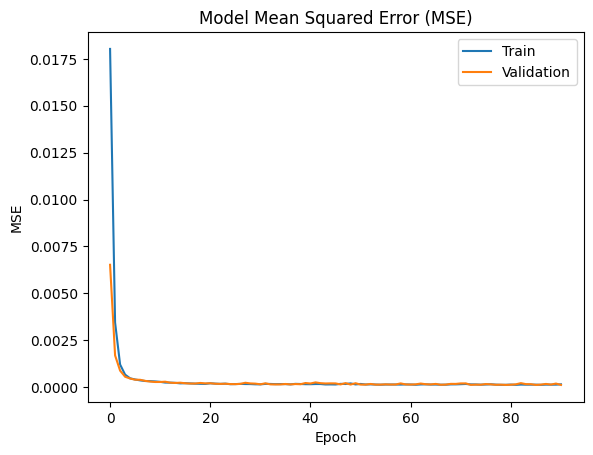

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

###**Tuning of Hyperparameters :- Batch Size and Epochs**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create the model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='linear'))  # Use linear activation for regression

    adam = Adam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam , metrics=['mean_squared_error'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=   2.7s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=   3.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=   3.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=   2.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.000 total time=   3.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.000 total time=  10.7s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.000 total time=  10.7s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.000 total time=  11.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.000 total time=  11.3s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END ....batch_size=10, epochs=50;, score=-0.000 total time=  10.3s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.000 total time=  19.4s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.000 total time=  21.5s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.000 total time=  19.2s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.000 total time=  20.1s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ...batch_size=10, epochs=100;, score=-0.000 total time=  21.5s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.001 total time=   2.8s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.000 total time=   2.3s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.001 total time=   1.9s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.001 total time=   2.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END ....batch_size=20, epochs=10;, score=-0.001 total time=   3.9s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.000 total time=   5.4s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.000 total time=   6.4s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.000 total time=   6.1s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.000 total time=  11.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END ....batch_size=20, epochs=50;, score=-0.000 total time=   6.2s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.000 total time=  10.1s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.000 total time=  11.2s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.000 total time=  10.6s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.000 total time=  11.2s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................
[CV 5/5; 6/9] END ...batch_size=20, epochs=100;, score=-0.000 total time=  10.8s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.015 total time=   2.2s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.011 total time=   1.6s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.003 total time=   1.6s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.020 total time=   1.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END ....batch_size=40, epochs=10;, score=-0.008 total time=   2.3s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.000 total time=   4.1s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.000 total time=   3.3s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.000 total time=   3.3s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.000 total time=   4.2s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END ....batch_size=40, epochs=50;, score=-0.000 total time=   3.5s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.000 total time=   5.9s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.000 total time=   6.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.000 total time=   6.1s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.000 total time=   6.2s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ...batch_size=40, epochs=100;, score=-0.000 total time=   7.4s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.0001196790864923969, using {'batch_size': 10, 'epochs': 100}
-0.00039137970888987185,5.849274487446705e-05 with: {'batch_size': 10, 'epochs': 10}
-0.00012265307595953344,2.2912060240981237e-05 with: {'batch_size': 10, 'epochs': 50}
-0.0001196790864923969,2.4271630802487554e-05 with: {'batch_size': 10, 'epochs': 100}
-0.000653958338079974,9.953361318486451e-05 with: {'batch_size': 20, 'epochs': 10}
-0.00014484536368399858,2.2757985668458924e-05 with: {'batch_size': 20, 'epochs': 50}
-0.0001329315811744891,8.68627052089353e-06 with: {'batch_size': 20, 'epochs': 100}
-0.011519692372530699,0.005794922656097353 with: {'batch_size': 40, 'epochs': 10}
-0.0002081984159303829,2.6385851360549115e-05 with: {'batch_size': 40, 'epochs': 50}
-0.00012926083290949465,2.4184994860919866e-05 with: {'batch_size': 40, 'epochs': 100}


###**Tuning of Hyperparameters:- Learning rate and Drop out rate**

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(10,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam)
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.002 total time=   1.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.006 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.001 total time=   1.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.006 total time=   1.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.075 total time=   1.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.000 total time=   2.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.021 total time=   1.4s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.003 total time=   1.6s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.006 total time=   1.6s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-0.010 total time=   1.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.002 total time=   1.6s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.004 total time=   1.4s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.001 total time=   2.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.087 total time=   2.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-0.012 total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.004 total time=   1.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.002 total time=   1.6s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.015 total time=   1.5s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.007 total time=   1.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-0.004 total time=   2.6s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.024 total time=   1.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.011 total time=   1.6s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.003 total time=   1.6s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.003 total time=   1.6s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-0.002 total time=   1.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.081 total time=   1.6s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.003 total time=   1.9s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.097 total time=   2.4s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.006 total time=   1.7s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-0.012 total time=   1.7s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.005 total time=   1.5s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.007 total time=   1.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.026 total time=   1.6s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.008 total time=   2.4s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-0.008 total time=   1.8s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.034 total time=   1.5s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.004 total time=   1.6s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.008 total time=   1.6s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.007 total time=   1.6s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-0.018 total time=   1.4s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.007 total time=   2.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.004 total time=   2.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.007 total time=   1.6s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.010 total time=   1.7s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-0.022 total time=   1.6s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.006479863123968243, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.01812287070788443,0.028715618572407505 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.008240438264328987,0.007279428468438762 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.021140063065104187,0.03321090694149711 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.006479863123968243,0.0043873116863286125 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.008608949882909656,0.008314750361860633 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.039545796206220986,0.04074841557367823 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.01085424106568098,0.007605937563741476 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.01441203560680151,0.011158184511444623 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.009887437894940376,0.006234910461870486 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


###**Training model with optimum values of Hyperparameters**

In [ ]:
from sklearn.metrics import mean_squared_error

# Defining the model
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    
    adam = Adam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam)
    return model

# Create the model
model = KerasRegressor(build_fn=create_model, verbose=0, batch_size=20, epochs=10)

# Fitting the model
model.fit(x_test, y_test)

# Predicting using trained model
y_predict = model.predict(x_test)

# Printing the metrics
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0015018074403537497
